# Sentiment Rater

[![Hugging Face](https://img.shields.io/badge/-Hugging%20Face-1da1f2?style=flat&logo=huggingface&logoColor=white)](https://huggingface.co/yiyanghkust/finbert-tone)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1I20t-SiUWBLTprGROIIuEt0dSvFZVofp?usp=sharing)


<p align="center">
  <img src="https://cdn.discordapp.com/attachments/780187538861064274/1101598451894059129/80573b17-1918-4c1e-a691-c8159edaf288.jpg" width="desired_width" style="object-fit: cover;">
</p>

<!-- this image is generated by BlueWillow AI with this prompt :
"A stunning and detailed photograph of a customer using a cutting-edge Sentiment Rater AI tool to analyze product reviews. The customer is sitting in front of a computer monitor, carefully studying the sentiment analysis results of various reviews for a new tech gadget. The Sentiment Rater tool is displayed on the screen, with colorful graphs and charts that highlight the positive and negative sentiment scores for each review. The customer is wearing a pair of noise-cancelling headphones, indicating the intense focus and concentration needed to make an informed purchasing decision. The composition is carefully crafted to convey the precision and accuracy of the AI tool, with sharp and crisp details that capture the texture and sheen of the computer monitor and the headphones. The background is a sleek and modern workspace, with clean lines and minimalistic design that further emphasizes the cutting-edge technology being used. This high-resolution image immerses viewers in the world of AI-powered product reviews, conveying the excitement and potential of this innovative new approach to consumer feedback."
-->

## Motivation

In today's competitive market, we are constantly looking for ways to improve the user experience and satisfaction. One important aspect of this is understanding how users perceive your product, which can be gleaned from their reviews and ratings. However, simply looking at the numerical ratings may not provide a complete picture of users' sentiments towards the product. Hence, the motivation for this project is to use sentiment analysis techniques to analyze the text descriptions of product reviews and derive a more nuanced understanding of users' feelings towards the product. By doing so, we can potentially identify specific areas of improvement and address users' pain points, leading to increased user satisfaction and loyalty.

**The goal**  is to use sentiment analysis to better understand the sentiment of product reviews and generate new ratings for the product. We will be scraping product reviews from Amazon and applying sentiment analysis to the review descriptions using an AI model (FinBert-tone).

## Steps
The Steps for this notebook are as follows:

- Collect a dataset of product reviews from Amazon.
- Apply sentiment analysis to the review descriptions to generate a sentiment score for each review.
- Use the sentiment scores to generate new ratings for the product.
- Plot the computed rating and compare with the old ones

### Import Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
!pip3 install transformers
!pip3 install pytorch torchvision -c pytorch

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'


### Load the dataset

In [68]:
reviews_df = pd.read_csv("Dataset/reviews.csv")
print(reviews_df.shape)
reviews_df.head()

(50, 8)


,id,profileName,text,date,title,rating,images,helpful
0,R3DD1LBIROZV5C,Sheila Gallagher,Molly is a maid at the Regencey Grand Hotel. ...,Reviewed in the United States 🇺🇸 on January 23...,Loved it!,5,NaN,3
1,R3SHD8KJUB1JOT,Kindle Customer,The Maid is a wonderful character study that h...,Reviewed in the United States 🇺🇸 on December 1...,Wonderful character study,4,NaN,40
2,R2U2OA7IJ4VHKM,K. Dorris,Molly is invisible. Molly is different. Molly ...,Reviewed in the United States 🇺🇸 on January 25...,A satisfying read,5,NaN,0
3,R3RX7XTLTR7FLO,Kodiwodi,Not just a good mystery but great insight into...,Reviewed in the United States 🇺🇸 on January 22...,Thoroughly enjoyable,4,NaN,0
4,R3KEPXXRBB6QHF,Noelle McNamee,Molly takes pride in the work she does that sh...,"Reviewed in the United States 🇺🇸 on January 8,...",Intriguing,4,NaN,4


In [69]:
reviews_df = reviews_df[["profileName","text","rating"]].copy()
print(reviews_df.shape)
reviews_df.head()

(50, 3)


,profileName,text,rating
0,Sheila Gallagher,Molly is a maid at the Regencey Grand Hotel. ...,5
1,Kindle Customer,The Maid is a wonderful character study that h...,4
2,K. Dorris,Molly is invisible. Molly is different. Molly ...,5
3,Kodiwodi,Not just a good mystery but great insight into...,4
4,Noelle McNamee,Molly takes pride in the work she does that sh...,4


In [70]:
reviews_df.dtypes

profileName    object
text           object
rating          int64
dtype: object

In [71]:
reviews_text = pd.DataFrame.head(reviews_df.text,30)
reviews_text.head()

0    Molly is a maid at the Regencey Grand Hotel.  ...
1    The Maid is a wonderful character study that h...
2    Molly is invisible. Molly is different. Molly ...
3    Not just a good mystery but great insight into...
4    Molly takes pride in the work she does that sh...
Name: text, dtype: object

### Load the model

In [72]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [73]:
sentences = reviews_text.tolist() #.astype(str) #rv.text.tolist()
results = nlp(sentences)

In [74]:
results = pd.DataFrame(results)
results.head()

,label,score
0,Neutral,0.998764
1,Neutral,0.980042
2,Neutral,0.923145
3,Negative,0.503404
4,Neutral,0.899570


In [75]:
results.dtypes

label     object
score    float64
dtype: object

### Compute the ratings from the results

In [94]:
def compute_rating(label, score):
    if label == 'Negative':
        rating = score + 1
    elif label == 'Neutral':
        rating = score + 3
    else:
        rating = score + 4
    return round(min(max(rating, 1), 5), 1)

In [115]:
# Apply to the dataset
reviews_df['computed_rating'] = results.apply(lambda x: compute_rating(x['label'], x['score']), axis=1)
reviews_df['computed_rating'] = pd.cut(x=reviews_df['computed_rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],  labels=[1, 2, 3, 4, 5])

<ipython-input-115-fd0208df0ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['computed_rating'] = results.apply(lambda x: compute_rating(x['label'], x['score']), axis=1)
<ipython-input-115-fd0208df0ba5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['computed_rating'] = pd.cut(x=reviews_df['computed_rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],  labels=[1, 2, 3, 4, 5])


In [116]:
# Select first 30 rows of DataFrame
reviews_df = reviews_df.iloc[:30]
reviews_df

,profileName,text,rating,computed_rating
0,Sheila Gallagher,Molly is a maid at the Regencey Grand Hotel. ...,5,4
1,Kindle Customer,The Maid is a wonderful character study that h...,4,4
2,K. Dorris,Molly is invisible. Molly is different. Molly ...,5,4
3,Kodiwodi,Not just a good mystery but great insight into...,4,1
4,Noelle McNamee,Molly takes pride in the work she does that sh...,4,4
5,Catherine,This is a quick enjoyable read about a quirky ...,4,2
6,Denise-Marie Martin,There is much to love about this slowly unwind...,4,5
7,E. Gambrell,"When I was a few chapters in, I was rather bor...",4,5
8,Janet O.,She’s only a maid…one of the “unseen “ people ...,5,4
9,Nancy M.,I love a good mystery and at first it seemed t...,5,4


### Plotting

<Axes: xlabel='rating', ylabel='count'>

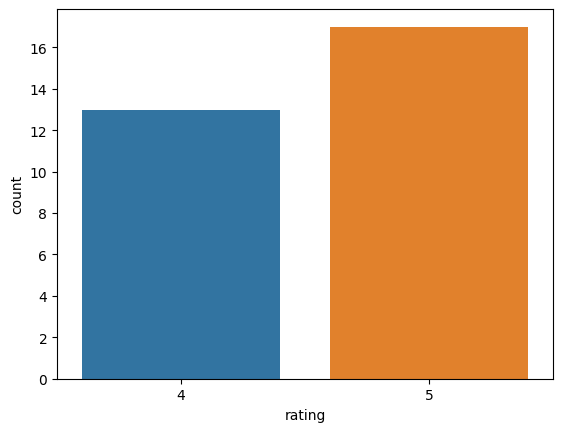

In [117]:
sns.countplot(data=reviews_df, x='rating')

<Axes: xlabel='computed_rating', ylabel='count'>

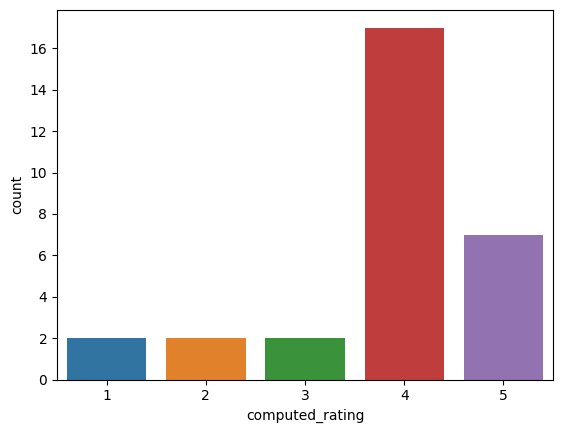

In [118]:
sns.countplot(data=reviews_df, x='computed_rating')

# Summary
In summary, this project used sentiment analysis to gain deeper insights into customer sentiment about a product and generated new ratings based on the sentiment analysis results. By providing a more accurate and comprehensive understanding of customer sentiment, this approach can help companies make data-driven decisions about how to improve their products and better meet the needs of their customers.

*So while this approach is interesting and could potentially provide some useful insights, it may not always be reliable or accurate. It is always important to keep in mind the limitations and potential biases*